### Neural Networks

In [2]:
import numpy as np
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# metrics
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import cross_val_score

# Para plotar a curva Roc
import scikitplot as skplt
import matplotlib.pyplot as plt

### Lendo a base de dados

In [3]:
X = pd.read_csv("./data/preprocessamento/X_normalized.csv", index_col=0)
y = pd.read_csv("./data/preprocessamento/y.csv", header=None, index_col=0)

In [4]:
# Divindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### Modelo

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(64), max_iter=500, alpha=0.0001,
                     solver='sgd', batch_size=64, random_state=42, verbose=10)

### Treino

In [6]:
clf.fit(X_train, y_train)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.59978102
Iteration 2, loss = 0.56506572
Iteration 3, loss = 0.56280959
Iteration 4, loss = 0.56213750
Iteration 5, loss = 0.56164603
Iteration 6, loss = 0.56114950
Iteration 7, loss = 0.56096325
Iteration 8, loss = 0.56052398
Iteration 9, loss = 0.56027397
Iteration 10, loss = 0.55992915
Iteration 11, loss = 0.55976178
Iteration 12, loss = 0.55954770
Iteration 13, loss = 0.55936389
Iteration 14, loss = 0.55920544
Iteration 15, loss = 0.55906407
Iteration 16, loss = 0.55894605
Iteration 17, loss = 0.55869553
Iteration 18, loss = 0.55859924
Iteration 19, loss = 0.55847491
Iteration 20, loss = 0.55836987
Iteration 21, loss = 0.55827729
Iteration 22, loss = 0.55817762
Iteration 23, loss = 0.55800420
Iteration 24, loss = 0.55797953
Iteration 25, loss = 0.55789878
Iteration 26, loss = 0.55782272
Iteration 27, loss = 0.55773597
Iteration 28, loss = 0.55772317
Iteration 29, loss = 0.55749765
Iteration 30, loss = 0.55747393
Iteration 31, loss = 0.55753246
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=64, learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

### Teste

In [8]:
y_pred = clf.predict(X_test)
y_prob =  clf.predict_proba(X_test)

print("Acuracia: ", accuracy_score(y_test, y_pred))

Acuracia:  0.7242820150659134


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


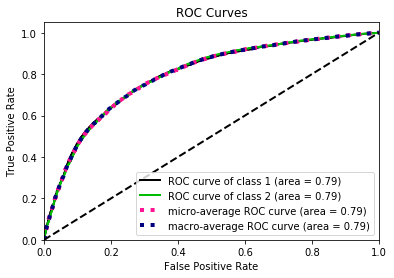

In [10]:
skplt.metrics.plot_roc_curve(y_test, y_prob)
plt.show()

### Teste utilizando CV

In [11]:
# Criando KNN
clf  = clf = MLPClassifier(hidden_layer_sizes=(64), max_iter=500, alpha=0.0001,
                     solver='sgd', batch_size=64, random_state=42)

# CV 5
cv_scores = cross_val_score(clf, X, y, cv=10)

/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

In [12]:
print("Cross-Validation Scores:")
for idx, score in enumerate(cv_scores):
    print(idx, " - ", score)

Cross-Validation Scores:
0  -  0.7328155339805825
1  -  0.7132038834951456
2  -  0.7178640776699029
3  -  0.728685181588658
4  -  0.7189745581666342
5  -  0.7315983686152651
6  -  0.7230530200038843
7  -  0.7142579642579643
8  -  0.7222222222222222
9  -  0.7204739704739704


In [14]:
cv_scores

array([0.73281553, 0.71320388, 0.71786408, 0.72868518, 0.71897456,
       0.73159837, 0.72305302, 0.71425796, 0.72222222, 0.72047397])